In [87]:
# Importing the necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from keras import layers, models
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D, BatchNormalization, ReLU
from keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

from sklearn.metrics import classification_report

tf.random.set_seed(23)

import os
import cv2
import random
import warnings
warnings.filterwarnings('ignore')

In [88]:
# !pip install tensorflow[and-cuda]
# !pip install tensorflow[and-cuda]==2.13.0 --user

In [89]:
train_path = '/kaggle/input/pneumonia-tuberculosis-normal/Train'
test_path = '/kaggle/input/pneumonia-tuberculosis-normal/Test'
img_width,img_height,channel = 96,96,3

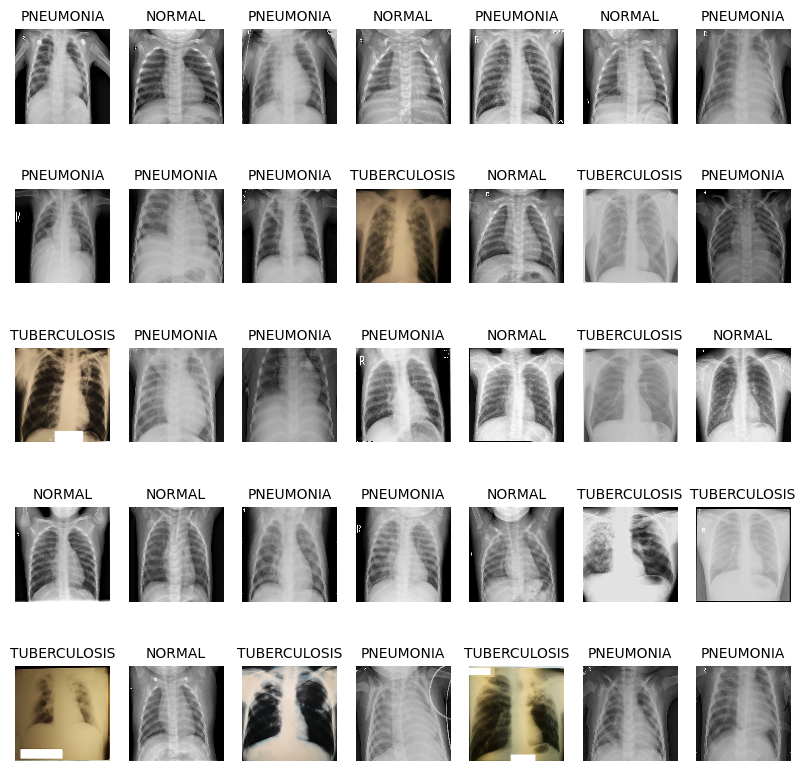

In [90]:
classes = ['PNEUMONIA','TUBERCULOSIS','NORMAL']
# we will import the train data , using this code
def import_data(dataset, path, categories):
    for i in categories:
        full_path = os.path.join(path,i)
        label = categories.index(i)
        for j in os.listdir(full_path):
            try:
                img = cv2.imread(os.path.join(full_path,j))
                img_resized = cv2.resize(img,(img_width,img_height))
                dataset.append([img_resized,label])
            except :
                pass
    random.shuffle(dataset)
    
# creating the dataset

train_df = []
import_data(train_df,train_path,classes)
train_df = pd.DataFrame(train_df,columns=['image','label'])
train_stack = np.stack(train_df.image)

# Images,
plt.figure(figsize=(10,10))
for i in range(35):
    plt.subplot(5,7,i+1)
    plt.imshow(train_df.image[i])
    plt.title(classes[train_df.label[i]],size=10)
    plt.axis('off')

In [91]:
# Train dataset
train_df.head(5)

,image,label
0,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",0
1,"[[[143, 143, 143], [133, 133, 133], [147, 147,...",2
2,"[[[206, 206, 206], [167, 167, 167], [169, 169,...",0
3,"[[[57, 57, 57], [63, 63, 63], [67, 67, 67], [5...",2
4,"[[[214, 214, 214], [124, 124, 124], [63, 63, 6...",0


In [92]:
train_df.label.value_counts()

label
0    700
2    700
1    655
Name: count, dtype: int64

In [93]:
# Loading the pretrained models :
from tensorflow.keras.applications import VGG16, VGG19, ResNet50, ResNet101, InceptionV3, MobileNet, Xception, NASNetMobile
from tensorflow.keras.applications import DenseNet121, EfficientNetB0

#DenseNet121---------------------------------------------->
densenet121 = DenseNet121(
    include_top = False,
    weights='imagenet',
    input_shape = (img_width,img_height,3))

densenet121.trainable = False

#EfficientNetB0------------------------------------------->
efficientnetB0 = EfficientNetB0(
    include_top = False,
    weights='imagenet',
    input_shape = (img_width,img_height,3))

efficientnetB0.trainable = False

#InceptionV3---------------------------------------------->
inceptionv3 = InceptionV3(
    include_top = False,
    weights='imagenet',
    input_shape = (img_width,img_height,3))

inceptionv3.trainable = False

#MobileNet----------------------------------------------->
mobilenet = MobileNet(
    include_top = False,
    weights='imagenet',
    input_shape = (img_width,img_height,3))

mobilenet.trainable = False

#Xception----------------------------------------------->
xception = Xception(
    include_top = False,
    weights='imagenet',
    input_shape = (img_width,img_height,3))

xception.trainable = False

#NASNetMobile--------------------------------------------->
nasnetmobile = NASNetMobile(
    include_top = False,
    weights='imagenet',
    input_shape = (img_width,img_height,3))

nasnetmobile.trainable = False

#vgg16--------------------------------------------------->
vgg16 = VGG16(
    include_top = False,
    weights='imagenet',
    input_shape = (img_width,img_height,3))

vgg16.trainable = False

#vgg19-------------------------------------------------->
vgg19 = VGG19(
    include_top = False,
    weights='imagenet',
    input_shape = (img_width,img_height,3))

vgg19.trainable = False

#Resnet50----------------------------------------------->
resnet50 = ResNet50(
    include_top = False,
    weights='imagenet',
    input_shape = (img_width,img_height,3))

resnet50.trainable = False

#Resnet101----------------------------------------------->
resnet101 = ResNet101(
    include_top = False,
    weights='imagenet',
    input_shape = (img_width,img_height,3))

resnet101.trainable = False


In [94]:
# model_1 NASNetMobile 

# let's build and train the model 
model_1 = Sequential()
model_1.add(nasnetmobile)
#ann layers
model_1.add(layers.Flatten())

model_1.add(layers.BatchNormalization())
model_1.add(layers.Dense(units=128,activation='relu', kernel_regularizer = keras.regularizers.l2(0.04)))
model_1.add(layers.Dropout(0.2))



#no of classes is 3
model_1.add(layers.Dense(units=3,activation='softmax'))

model_1.compile(optimizer=Adam(learning_rate=0.01), loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])


model_1.fit(train_stack,train_df.label,epochs=20, validation_split = 0.2)

Epoch 1/20
 7/52 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.5563 - loss: 9.2421 

W0000 00:00:1713502829.937958      91 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step - accuracy: 0.7131 - loss: 8.3514

W0000 00:00:1713502843.271313      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1713502856.681916      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


52/52 ━━━━━━━━━━━━━━━━━━━━ 71s 679ms/step - accuracy: 0.7141 - loss: 8.3113 - val_accuracy: 0.8662 - val_loss: 2.0383
Epoch 2/20
 3/52 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.7951 - loss: 2.7040

W0000 00:00:1713502864.560426      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.7774 - loss: 2.0626 - val_accuracy: 0.8954 - val_loss: 1.0225
Epoch 3/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8188 - loss: 1.3141 - val_accuracy: 0.8929 - val_loss: 0.9634
Epoch 4/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8103 - loss: 1.3703 - val_accuracy: 0.8783 - val_loss: 1.1186
Epoch 5/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8171 - loss: 1.4371 - val_accuracy: 0.8418 - val_loss: 1.1714
Epoch 6/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8132 - loss: 1.2922 - val_accuracy: 0.8735 - val_loss: 1.0520
Epoch 7/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8173 - loss: 1.3125 - val_accuracy: 0.8783 - val_loss: 1.0089
Epoch 8/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8381 - loss: 1.1156 - val_accuracy: 0.8905 - val_loss: 0.9809
Epoch 9/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8458 - loss: 1.2043 - val_accuracy: 0.8735 - val_loss: 0.

<Axes: >

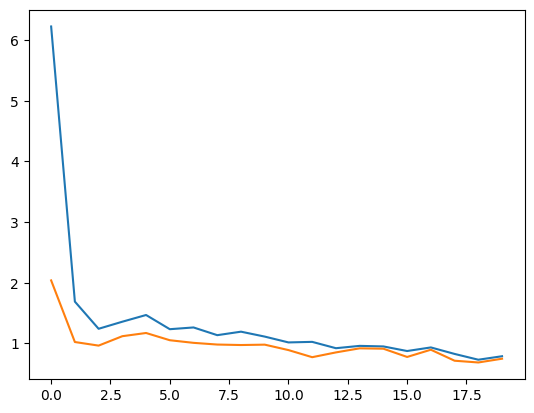

In [95]:
sns.lineplot(model_1.history.history['loss'])
sns.lineplot(model_1.history.history['val_loss'])

In [96]:
# model_2 EfficientNetB0

# let's build and train the model 
model_2 = Sequential()
model_2.add(efficientnetB0)
#ann layers
model_2.add(layers.Flatten())

# model_2.add(layers.BatchNormalization())
model_2.add(layers.Dense(units=256,activation='relu'))
model_2.add(layers.Dropout(0.4 ))



#no of classes is 3
model_2.add(layers.Dense(units=3,activation='softmax'))
model_2.compile(optimizer=Adam(learning_rate=0.0009), loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

model_2.fit(train_stack,train_df.label,epochs=20, validation_split = 0.2)

Epoch 1/20
10/52 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6206 - loss: 1.6815

W0000 00:00:1713502917.845998      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step - accuracy: 0.7865 - loss: 0.8835

W0000 00:00:1713502935.060976      91 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1713502940.356802      91 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


52/52 ━━━━━━━━━━━━━━━━━━━━ 53s 500ms/step - accuracy: 0.7881 - loss: 0.8758 - val_accuracy: 0.9392 - val_loss: 0.1700
Epoch 2/20


W0000 00:00:1713502943.350424      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


52/52 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.9378 - loss: 0.1425 - val_accuracy: 0.9440 - val_loss: 0.1609
Epoch 3/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9388 - loss: 0.1528 - val_accuracy: 0.9586 - val_loss: 0.1145
Epoch 4/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9519 - loss: 0.1163 - val_accuracy: 0.9684 - val_loss: 0.0945
Epoch 5/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9616 - loss: 0.0964 - val_accuracy: 0.9684 - val_loss: 0.0916
Epoch 6/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9648 - loss: 0.0929 - val_accuracy: 0.9611 - val_loss: 0.1010
Epoch 7/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9632 - loss: 0.0866 - val_accuracy: 0.9757 - val_loss: 0.0950
Epoch 8/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9712 - loss: 0.0682 - val_accuracy: 0.9732 - val_loss: 0.0877
Epoch 9/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9670 - loss: 0.0787 - val_accuracy: 0.9684 - val_loss: 0

<Axes: >

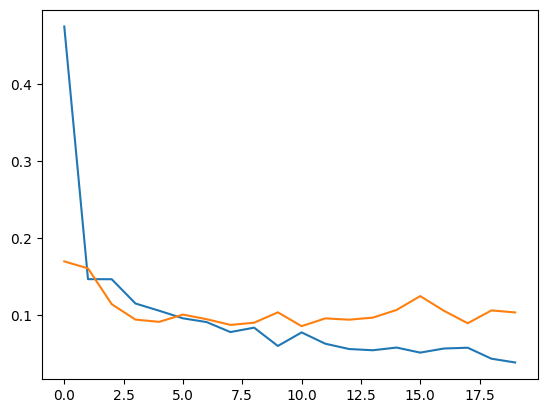

In [97]:
sns.lineplot(model_2.history.history['loss'])
sns.lineplot(model_2.history.history['val_loss'])

In [98]:
# model_3 vgg16
# let's build and train the model 
model_3 = Sequential()
model_3.add(vgg16)
# ann layers
model_3.add(layers.Flatten())

model_3.add(layers.BatchNormalization())
model_3.add(layers.Dense(units=128,activation='relu',kernel_regularizer = keras.regularizers.l2(0.04)))
model_3.add(layers.Dropout(0.57))

model_3.add(layers.BatchNormalization())
model_3.add(layers.Dense(units=64,activation='relu'))
model_3.add(layers.Dropout(0.5))

#no of classes is 3
model_3.add(layers.Dense(units=3,activation='softmax'))

model_3.compile(optimizer=Adam(learning_rate=0.0007), loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])


model_3.fit(train_stack,train_df.label,epochs=20, validation_split = 0.2)

Epoch 1/20
 5/52 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.4377 - loss: 11.2860

W0000 00:00:1713503002.580902      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.6401 - loss: 8.9144

W0000 00:00:1713503007.405561      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1713503008.282054      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


52/52 ━━━━━━━━━━━━━━━━━━━━ 12s 128ms/step - accuracy: 0.6424 - loss: 8.8829 - val_accuracy: 0.9367 - val_loss: 4.7508
Epoch 2/20
 6/52 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9174 - loss: 4.6834

W0000 00:00:1713503009.114233      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9007 - loss: 4.1753 - val_accuracy: 0.9538 - val_loss: 2.5164
Epoch 3/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9394 - loss: 2.2728 - val_accuracy: 0.9732 - val_loss: 1.4329
Epoch 4/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9446 - loss: 1.3561 - val_accuracy: 0.9684 - val_loss: 0.9089
Epoch 5/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9446 - loss: 0.9222 - val_accuracy: 0.9732 - val_loss: 0.7259
Epoch 6/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9399 - loss: 0.8082 - val_accuracy: 0.9732 - val_loss: 0.6401
Epoch 7/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9680 - loss: 0.6433 - val_accuracy: 0.9757 - val_loss: 0.4870
Epoch 8/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9600 - loss: 0.5436 - val_accuracy: 0.9708 - val_loss: 0.5417
Epoch 9/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9556 - loss: 0.5810 - val_accuracy: 0.9611 - val_loss: 0.

<Axes: >

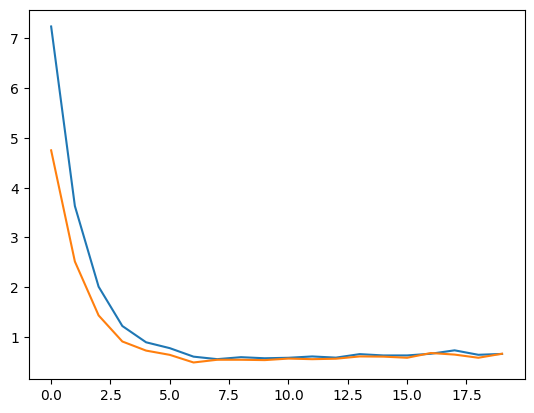

In [99]:
sns.lineplot(model_3.history.history['loss'])
sns.lineplot(model_3.history.history['val_loss'])

In [100]:
# model_4 vgg19
# let's build and train the model 
model_4 = Sequential()
model_4.add(vgg19)
#ann layers
model_4.add(layers.Flatten())

model_4.add(layers.BatchNormalization())
model_4.add(layers.Dense(units=128,activation='relu', kernel_regularizer = keras.regularizers.l2(0.04)))
model_4.add(layers.Dropout(0.5))

model_4.add(layers.BatchNormalization())
model_4.add(layers.Dense(units=128,activation='relu', kernel_regularizer = keras.regularizers.l2(0.04)))
model_4.add(layers.Dropout(0.5))

#no of classes is 3
model_4.add(layers.Dense(units=3,activation='softmax'))

model_4.compile(optimizer=Adam(learning_rate=0.0007), loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

model_4.fit(train_stack,train_df.label,epochs=20, validation_split = 0.2)

Epoch 1/20
 5/52 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - accuracy: 0.4379 - loss: 16.2591

W0000 00:00:1713503049.110302      89 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.6858 - loss: 13.3417

W0000 00:00:1713503054.258920      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1713503055.223335      90 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


52/52 ━━━━━━━━━━━━━━━━━━━━ 13s 139ms/step - accuracy: 0.6881 - loss: 13.2981 - val_accuracy: 0.9100 - val_loss: 7.3942
Epoch 2/20
 5/52 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9248 - loss: 7.1829

W0000 00:00:1713503056.196376      91 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9415 - loss: 6.1820 - val_accuracy: 0.9611 - val_loss: 3.5373
Epoch 3/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9547 - loss: 3.0748 - val_accuracy: 0.9684 - val_loss: 1.8772
Epoch 4/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9607 - loss: 1.6473 - val_accuracy: 0.9635 - val_loss: 1.0836
Epoch 5/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9701 - loss: 0.9795 - val_accuracy: 0.9708 - val_loss: 0.7181
Epoch 6/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9696 - loss: 0.6762 - val_accuracy: 0.9586 - val_loss: 0.5657
Epoch 7/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9792 - loss: 0.5103 - val_accuracy: 0.9684 - val_loss: 0.4475
Epoch 8/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9637 - loss: 0.4791 - val_accuracy: 0.9781 - val_loss: 0.4811
Epoch 9/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9720 - loss: 0.4683 - val_accuracy: 0.9684 - val_loss: 0.

<Axes: >

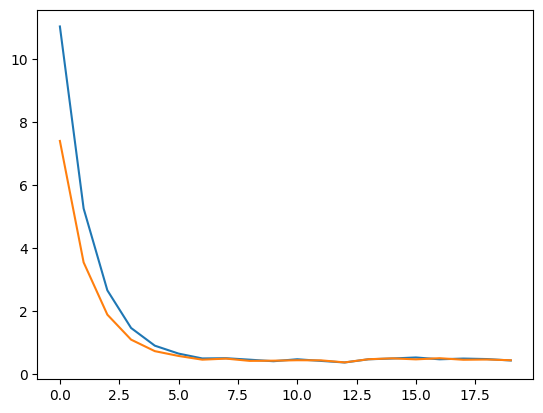

In [101]:
sns.lineplot(model_4.history.history['loss'])
sns.lineplot(model_4.history.history['val_loss'])

In [102]:
# model_5 resnet50

# let's build and train the model 
model_5 = Sequential()
model_5.add(resnet50)
#ann layers
model_5.add(layers.Flatten())

model_5.add(layers.BatchNormalization())
model_5.add(layers.Dense(units=64,activation='relu',kernel_regularizer = keras.regularizers.l2(0.04)))
model_5.add(layers.Dropout(0.6))


model_5.add(layers.Dense(units=3,activation='softmax'))

model_5.compile(optimizer=Adam(learning_rate=0.0006), loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])


model_5.fit(train_stack,train_df.label,epochs=20, validation_split = 0.2)

Epoch 1/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 22s 216ms/step - accuracy: 0.8083 - loss: 5.4850 - val_accuracy: 0.9586 - val_loss: 3.7192
Epoch 2/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9256 - loss: 3.5918 - val_accuracy: 0.9586 - val_loss: 2.6205
Epoch 3/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9378 - loss: 2.4799 - val_accuracy: 0.9635 - val_loss: 1.8582
Epoch 4/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9437 - loss: 1.7880 - val_accuracy: 0.9684 - val_loss: 1.4186
Epoch 5/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9604 - loss: 1.3429 - val_accuracy: 0.9586 - val_loss: 1.1459
Epoch 6/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9559 - loss: 1.1337 - val_accuracy: 0.9611 - val_loss: 0.9891
Epoch 7/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9541 - loss: 1.0464 - val_accuracy: 0.9489 - val_loss: 0.9717
Epoch 8/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9559 - loss: 0.8965 - val_accuracy: 0.9513 -

<Axes: >

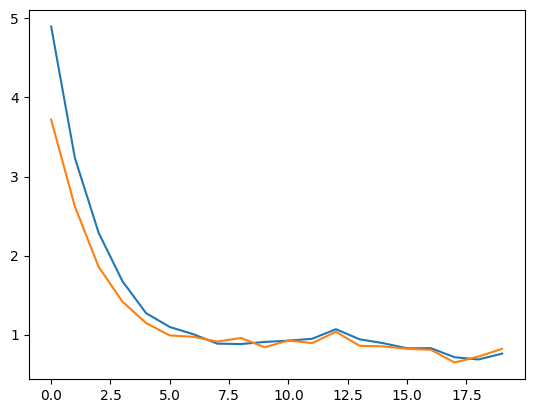

In [103]:
sns.lineplot(model_5.history.history['loss'])
sns.lineplot(model_5.history.history['val_loss'])

In [104]:
# model_6 Resnet101
 
# let's build and train the model 
model_6 = Sequential()
model_6.add(resnet101)
#ann layers
model_6.add(layers.Flatten())

# model_6.add(layers.BatchNormalization())
model_6.add(layers.Dense(units=64,activation='relu'))
model_6.add(layers.Dropout(0.4))


#no of classes is 3
model_6.add(layers.Dense(units=3,activation='softmax'))

model_6.compile(optimizer=Adam(learning_rate=0.0009), loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])


model_6.fit(train_stack,train_df.label,epochs=20, validation_split = 0.2)

Epoch 1/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 40s 359ms/step - accuracy: 0.6956 - loss: 3.5819 - val_accuracy: 0.9513 - val_loss: 0.1597
Epoch 2/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.9119 - loss: 0.2313 - val_accuracy: 0.9659 - val_loss: 0.1160
Epoch 3/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.9238 - loss: 0.1862 - val_accuracy: 0.9684 - val_loss: 0.1076
Epoch 4/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.9395 - loss: 0.1452 - val_accuracy: 0.9659 - val_loss: 0.0947
Epoch 5/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.9473 - loss: 0.1284 - val_accuracy: 0.9659 - val_loss: 0.0926
Epoch 6/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.9555 - loss: 0.1027 - val_accuracy: 0.9611 - val_loss: 0.0731
Epoch 7/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.9587 - loss: 0.1253 - val_accuracy: 0.9684 - val_loss: 0.0991
Epoch 8/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.9522 - loss: 0.1184 - val_accuracy: 0.9586 -

<Axes: >

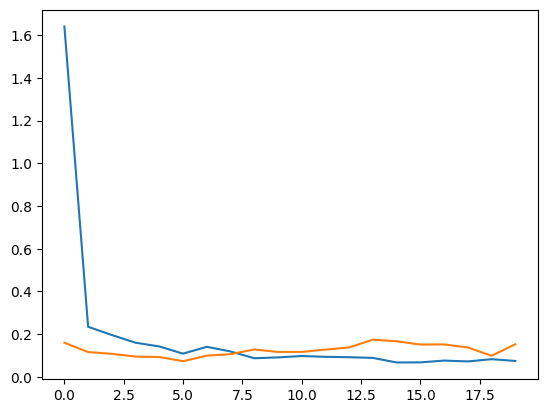

In [105]:
sns.lineplot(model_6.history.history['loss'])
sns.lineplot(model_6.history.history['val_loss'])

In [106]:
# model_7 DenseNet121

# let's build and train the model 
model_7 = Sequential()
model_7.add(densenet121)
#ann layers
model_7.add(layers.Flatten())

# model.add(layers.BatchNormalization())
model_7.add(layers.Dense(units=128,activation='relu',kernel_regularizer = keras.regularizers.l2(0.04)))
model_7.add(layers.Dropout(0.2))


#no of classes is 3
model_7.add(layers.Dense(units=3,activation='softmax'))

model_7.compile(optimizer=Adam(learning_rate=0.0009), loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])


model_7.fit(train_stack,train_df.label,epochs=20, validation_split = 0.2)

Epoch 1/20
 5/52 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.3809 - loss: 26.6470

W0000 00:00:1713503253.826543      91 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step - accuracy: 0.6660 - loss: 13.1430

W0000 00:00:1713503262.890341      90 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1713503271.701180      90 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


52/52 ━━━━━━━━━━━━━━━━━━━━ 44s 450ms/step - accuracy: 0.6685 - loss: 13.0372 - val_accuracy: 0.8127 - val_loss: 3.7166
Epoch 2/20
 5/52 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8392 - loss: 3.5852

W0000 00:00:1713503276.762941      91 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9087 - loss: 3.0488 - val_accuracy: 0.9489 - val_loss: 2.2314
Epoch 3/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9527 - loss: 2.0935 - val_accuracy: 0.9562 - val_loss: 1.7132
Epoch 4/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9477 - loss: 1.6599 - val_accuracy: 0.9440 - val_loss: 1.4106
Epoch 5/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9361 - loss: 1.3487 - val_accuracy: 0.9343 - val_loss: 1.2220
Epoch 6/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9447 - loss: 1.1480 - val_accuracy: 0.9075 - val_loss: 1.1105
Epoch 7/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9160 - loss: 1.0931 - val_accuracy: 0.9392 - val_loss: 0.9358
Epoch 8/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9283 - loss: 0.9425 - val_accuracy: 0.9465 - val_loss: 0.8103
Epoch 9/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.9366 - loss: 0.8249 - val_accuracy: 0.9416 - val_loss: 0.

<Axes: title={'center': 'DenseNet121'}>

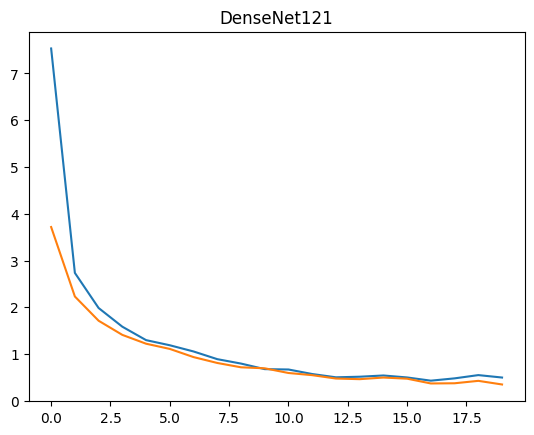

In [107]:
plt.title('DenseNet121')
sns.lineplot(model_7.history.history['loss'])
sns.lineplot(model_7.history.history['val_loss'])

In [108]:
# model_8  vgg16 + cnn
tf.random.set_seed(23)
# let's build and train the model 
model_8 = Sequential()
model_8.add(vgg16)
model_8.add(layers.Conv2D(32,(4,4),padding = 'same',activation = 'relu'))
model_8.add(layers.Dropout(0.5))

# ann layers
model_8.add(layers.Flatten())
model_8.add(layers.BatchNormalization())
model_8.add(layers.Dense(units=64,activation='relu',kernel_regularizer = keras.regularizers.l2(0.04)))
model_8.add(layers.Dropout(0.55))

#no of classes is 3
model_8.add(layers.Dense(units=3,activation='softmax'))
model_8.compile(optimizer=Adam(learning_rate=0.00028), loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

model_8.fit(train_stack, train_df. label,epochs=20, validation_split = 0.2)

Epoch 1/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 12s 125ms/step - accuracy: 0.5093 - loss: 5.3454 - val_accuracy: 0.9173 - val_loss: 3.9219
Epoch 2/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.8222 - loss: 4.0014 - val_accuracy: 0.9319 - val_loss: 3.3461
Epoch 3/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.8857 - loss: 3.3520 - val_accuracy: 0.9343 - val_loss: 2.8346
Epoch 4/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9050 - loss: 2.8478 - val_accuracy: 0.9538 - val_loss: 2.3902
Epoch 5/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9323 - loss: 2.3917 - val_accuracy: 0.9586 - val_loss: 2.0192
Epoch 6/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9402 - loss: 2.0338 - val_accuracy: 0.9562 - val_loss: 1.7075
Epoch 7/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9496 - loss: 1.6897 - val_accuracy: 0.9635 - val_loss: 1.4395
Epoch 8/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9489 - loss: 1.4348 - val_accuracy: 0.9659 -

<Axes: title={'center': 'VGG16+CNN'}>

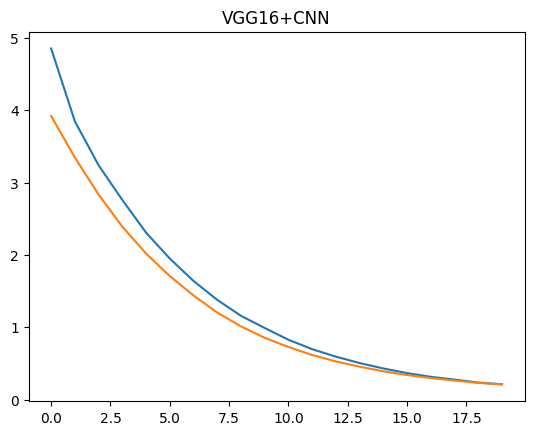

In [109]:
plt.title('VGG16+CNN')
sns.lineplot(model_8.history.history['loss'])
sns.lineplot(model_8.history.history['val_loss'])

In [110]:
# model_9 InceptionV3

# let's build and train the model 
model_9 = Sequential()
model_9.add(inceptionv3)
#ann layers
model_9.add(layers.Flatten())

model_9.add(layers.BatchNormalization())
model_9.add(layers.Dense(units=128,activation='relu', kernel_regularizer = keras.regularizers.l2(0.04)))
model_9.add(layers.Dropout(0.5))

# model.add(layers.BatchNormalization())
# model.add(layers.Dense(units=64,activation='relu'))
# model.add(layers.Dropout(0.5))

#no of classes is 3
model_9.add(layers.Dense(units=3,activation='softmax'))

model_9.compile(optimizer=Adam(learning_rate=0.0009), loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])


model_9.fit(train_stack,train_df.label,epochs=20, validation_split = 0.2)

Epoch 1/20
 7/52 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.6165 - loss: 10.4314

W0000 00:00:1713503365.147839      91 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.7344 - loss: 8.8174

W0000 00:00:1713503371.314790      91 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1713503376.884223      91 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


52/52 ━━━━━━━━━━━━━━━━━━━━ 29s 300ms/step - accuracy: 0.7352 - loss: 8.7898 - val_accuracy: 0.7372 - val_loss: 5.8323
Epoch 2/20
 5/52 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8011 - loss: 4.7664

W0000 00:00:1713503380.421439      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8265 - loss: 4.1734 - val_accuracy: 0.8637 - val_loss: 2.7105
Epoch 3/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8609 - loss: 2.3059 - val_accuracy: 0.8613 - val_loss: 1.6635
Epoch 4/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8744 - loss: 1.4559 - val_accuracy: 0.8905 - val_loss: 1.0445
Epoch 5/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8828 - loss: 1.0431 - val_accuracy: 0.8929 - val_loss: 0.7581
Epoch 6/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8800 - loss: 0.7784 - val_accuracy: 0.9100 - val_loss: 0.6105
Epoch 7/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8836 - loss: 0.6653 - val_accuracy: 0.8978 - val_loss: 0.5902
Epoch 8/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8679 - loss: 0.6639 - val_accuracy: 0.8954 - val_loss: 0.5985
Epoch 9/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8780 - loss: 0.6017 - val_accuracy: 0.9027 - val_loss: 0.

<Axes: title={'center': 'InceptionV3'}>

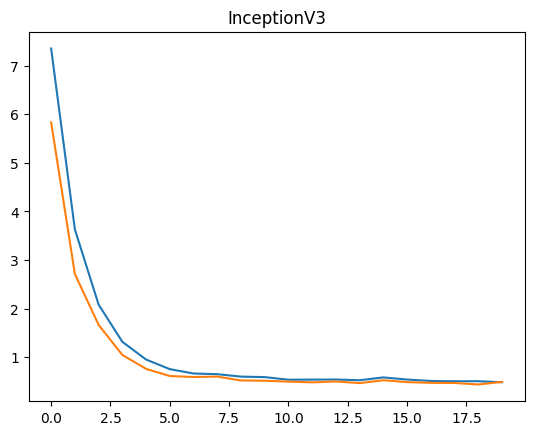

In [111]:
plt.title('InceptionV3')
sns.lineplot(model_9.history.history['loss'])
sns.lineplot(model_9.history.history['val_loss'])

In [112]:
# model_10 MobileNet

# let's build and train the model 
model_10 = Sequential()
model_10.add(mobilenet)
#ann layers
model_10.add(layers.Flatten())

# model.add(layers.BatchNormalization())
model_10.add(layers.Dense(units=128,activation='relu'))
model_10.add(layers.Dropout(0.5))

# model.add(layers.BatchNormalization())
# model.add(layers.Dense(units=64,activation='relu'))
# model.add(layers.Dropout(0.5))

#no of classes is 3
model_10.add(layers.Dense(units=3,activation='softmax'))

model_10.compile(optimizer=Adam(learning_rate=0.0009), loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])


model_10.fit(train_stack,train_df.label,epochs=20, validation_split = 0.2)

Epoch 1/20
19/52 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5037 - loss: 4.5290 

W0000 00:00:1713503404.436216      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.6209 - loss: 2.7824

W0000 00:00:1713503407.231186      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1713503408.979416      91 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


52/52 ━━━━━━━━━━━━━━━━━━━━ 11s 111ms/step - accuracy: 0.6231 - loss: 2.7543 - val_accuracy: 0.9319 - val_loss: 0.2153
Epoch 2/20
13/52 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8563 - loss: 0.3442

W0000 00:00:1713503410.086023      90 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8696 - loss: 0.3330 - val_accuracy: 0.9367 - val_loss: 0.1816
Epoch 3/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8746 - loss: 0.2708 - val_accuracy: 0.9538 - val_loss: 0.1295
Epoch 4/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9115 - loss: 0.2203 - val_accuracy: 0.9489 - val_loss: 0.1356
Epoch 5/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9134 - loss: 0.2318 - val_accuracy: 0.9538 - val_loss: 0.1381
Epoch 6/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9296 - loss: 0.1847 - val_accuracy: 0.9513 - val_loss: 0.1292
Epoch 7/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9246 - loss: 0.1794 - val_accuracy: 0.9513 - val_loss: 0.1460
Epoch 8/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9298 - loss: 0.1701 - val_accuracy: 0.9659 - val_loss: 0.1262
Epoch 9/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9492 - loss: 0.1442 - val_accuracy: 0.9586 - val_loss: 0.1326
Ep

<Axes: title={'center': 'MobileNet'}>

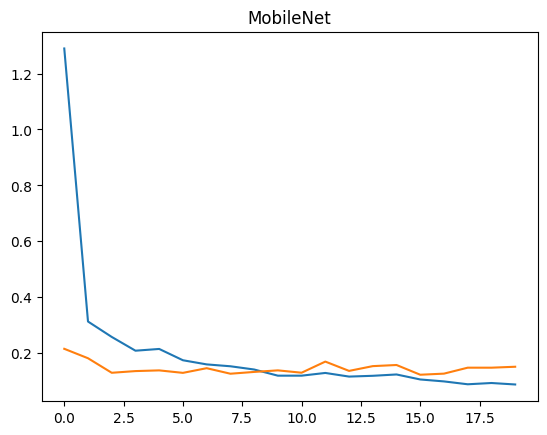

In [113]:
plt.title('MobileNet')
sns.lineplot(model_10.history.history['loss'])
sns.lineplot(model_10.history.history['val_loss'])

In [114]:
# model_11 Xception

# let's build and train the model 
model_11 = Sequential()
model_11.add(xception)
#ann layers
model_11.add(layers.Flatten())

model_11.add(layers.BatchNormalization())
model_11.add(layers.Dense(units=128,activation='relu', kernel_regularizer = keras.regularizers.l2(0.04)))
model_11.add(layers.Dropout(0.3))

# model.add(layers.BatchNormalization())
model_11.add(layers.Dense(units=128,activation='relu'))
model_11.add(layers.Dropout(0.3))

#no of classes is 3
model_11.add(layers.Dense(units=3,activation='softmax'))

model_11.compile(optimizer=Adam(learning_rate=0.0009), loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])


model_11.fit(train_stack,train_df.label,epochs=20, validation_split = 0.2)

Epoch 1/20
 5/52 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.4949 - loss: 10.8107

W0000 00:00:1713503429.446399      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.6953 - loss: 8.1428

W0000 00:00:1713503435.304713      91 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1713503438.230293      88 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


52/52 ━━━━━━━━━━━━━━━━━━━━ 21s 210ms/step - accuracy: 0.6964 - loss: 8.1163 - val_accuracy: 0.8856 - val_loss: 4.6706
Epoch 2/20
 7/52 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8580 - loss: 4.2834

W0000 00:00:1713503440.187827      91 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.8347 - loss: 3.9013 - val_accuracy: 0.8710 - val_loss: 2.8508
Epoch 3/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.8433 - loss: 2.7072 - val_accuracy: 0.8978 - val_loss: 1.9962
Epoch 4/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.8524 - loss: 2.2579 - val_accuracy: 0.8759 - val_loss: 2.0639
Epoch 5/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.8475 - loss: 2.1702 - val_accuracy: 0.8881 - val_loss: 1.6222
Epoch 6/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.8371 - loss: 1.7247 - val_accuracy: 0.8808 - val_loss: 1.2967
Epoch 7/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.8515 - loss: 1.4729 - val_accuracy: 0.9270 - val_loss: 1.1964
Epoch 8/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.8709 - loss: 1.3344 - val_accuracy: 0.9221 - val_loss: 1.1779
Epoch 9/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.8734 - loss: 1.3934 - val_accuracy: 0.9100 - val_loss: 1.

<Axes: title={'center': 'Xception'}>

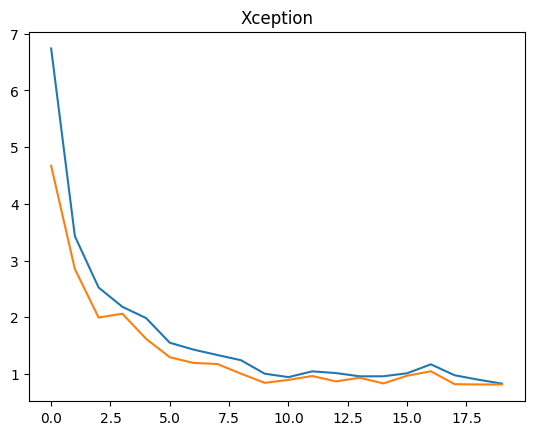

In [115]:
plt.title('Xception')
sns.lineplot(model_11.history.history['loss'])
sns.lineplot(model_11.history.history['val_loss'])

In [116]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [117]:
# model_12  VGG16+ 2CNN

# let's build and train the model 
model_12 = Sequential()
model_12.add(vgg16)
model_12.add(layers.Conv2D(32,(3,3),padding='same',activation = 'relu'))
model_12.add(layers.Dropout(0.55))
model_12.add(layers.Conv2D(32,(5,5),padding='same',activation = 'relu'))


# ann layers
model_12.add(layers.Flatten())
model_12.add(layers.BatchNormalization())
model_12.add(layers.Dense(units=64,activation='relu',kernel_regularizer = keras.regularizers.l2(0.04)))
model_12.add(layers.Dropout(0.55))

#no of classes is 3
model_12.add(layers.Dense(units=3,activation='softmax'))
model_12.compile(optimizer=Adam(learning_rate=0.0002), loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])

model_12.fit(train_stack,train_df.label,epochs=80, validation_split = 0.2, callbacks= early_stopping)


Epoch 1/80
52/52 ━━━━━━━━━━━━━━━━━━━━ 12s 130ms/step - accuracy: 0.3961 - loss: 5.7544 - val_accuracy: 0.8394 - val_loss: 4.2956
Epoch 2/80
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.7220 - loss: 4.5612 - val_accuracy: 0.9124 - val_loss: 3.8342
Epoch 3/80
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.8504 - loss: 3.9900 - val_accuracy: 0.9319 - val_loss: 3.4838
Epoch 4/80
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.8613 - loss: 3.6259 - val_accuracy: 0.9343 - val_loss: 3.1655
Epoch 5/80
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.8783 - loss: 3.2525 - val_accuracy: 0.9465 - val_loss: 2.8662
Epoch 6/80
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.8970 - loss: 2.9401 - val_accuracy: 0.9392 - val_loss: 2.5930
Epoch 7/80
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9165 - loss: 2.6321 - val_accuracy: 0.9465 - val_loss: 2.3459
Epoch 8/80
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.9363 - loss: 2.3453 - val_accuracy: 0.9513 -

<Axes: title={'center': 'VGG16+ 2CNN'}>

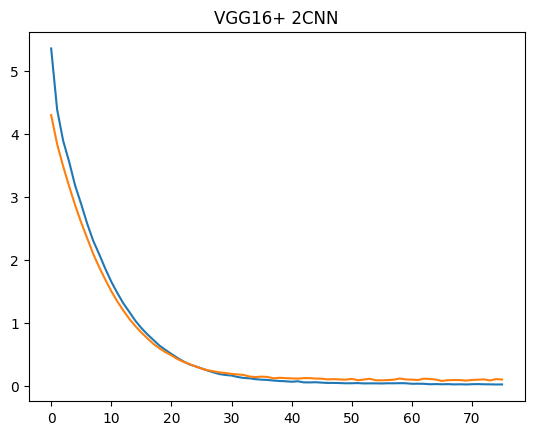

In [118]:
plt.title('VGG16+ 2CNN')
sns.lineplot(model_12.history.history['loss'])
sns.lineplot(model_12.history.history['val_loss'])


In [119]:
models = [model_1,model_2,model_3,model_4,model_5,model_6,model_7,model_8,model_9,model_10,model_11,model_12]
models_name = {model_1:'NASNetMobile', model_2:'EfficientNetB0', model_3:'VGG16',
               model_4:'VGG19', model_5:'Resnet50', model_6:'Resnet101', model_7:'DenseNet121',
               model_8:'VGG16+CNN',model_9:'InceptionV3',model_10:'MobileNet', model_11:'Xception',
               model_12:'VGG16+ 2CNN'}

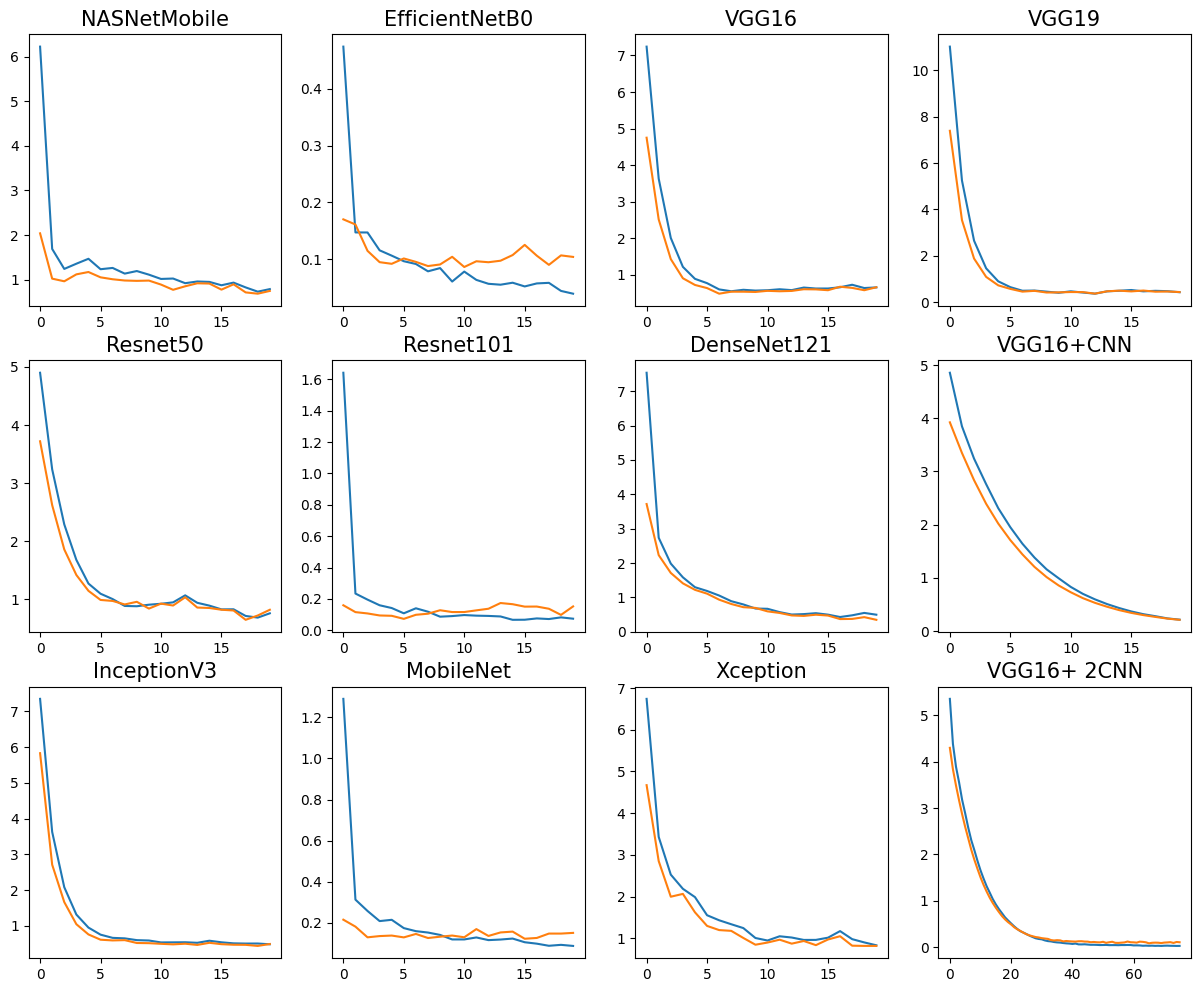

In [120]:
plt.figure(figsize = (15,12))

for i in range(len(models)):
    # creating 12 subplots as we have 12 models
    plt.subplot(3,4,i+1)
    plt.title(f'{models_name[models[i]]}',size=15)
    sns.lineplot(models[i].history.history['loss'])
    sns.lineplot(models[i].history.history['val_loss'])

In [122]:
# Now we will do the predictions on the test data:

test_df = []
import_data(test_df, test_path, classes)
test_df = pd.DataFrame(test_df,columns=['image','label'])
test_stack = np.stack(test_df.image)

In [123]:
#let's print the test dataset
test_df.head(5)

,image,label
0,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",1
1,"[[[42, 42, 42], [51, 51, 51], [60, 60, 60], [6...",2
2,"[[[18, 18, 18], [31, 31, 31], [37, 37, 37], [4...",2
3,"[[[158, 158, 158], [209, 209, 209], [96, 96, 9...",2
4,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",2


In [124]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

In [127]:
def  prediction(model,test_stack = test_stack, test_df = test_df):
    ''' we will take the different models and do the predictions '''
    
    output = model.predict(test_stack)
    prediction = [np.argmax(i) for i in output]
    print("-"*60)
    print(f'Model Name - {models_name[model]}')
    print(f'Accuracy Score : {accuracy_score(test_df.label,prediction)}')
    print(f'Precision Score : {precision_score(test_df.label,prediction, average="weighted")}')
    print(f'Recall Score : {recall_score(test_df.label,prediction, average="weighted")}')
    print(f'F1 Score : {f1_score(test_df.label,prediction, average="weighted")}')
    print()
    
for i in models:
    prediction(i)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
------------------------------------------------------------
Model Name - NASNetMobile
Accuracy Score : 0.8987341772151899
Precision Score : 0.8984999277548393
Recall Score : 0.8987341772151899
F1 Score : 0.8985636535705238

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
------------------------------------------------------------
Model Name - EfficientNetB0
Accuracy Score : 0.9620253164556962
Precision Score : 0.9620253164556962
Recall Score : 0.9620253164556962
F1 Score : 0.9620253164556962

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
------------------------------------------------------------
Model Name - VGG16
Accuracy Score : 0.9683544303797469
Precision Score : 0.96826904973532
Recall Score : 0.9683544303797469
F1 Score : 0.968254090100088

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
------------------------------------------------------------
Model Name - VGG19
Accuracy Score : 0.9556962025316456
Precision Score : 0.9591895446325825
Recall Score : 0.95569620253

#### Observation :
* Densenet121, VGG16 with CNN's are performing best.
* Achieved a accuracy of 98.10% 